In [1]:
import pandas as pd
import re

filename = "maros_meszaros_dense_posdef_homogeneous"
data_df = pd.read_csv(f"results/{filename}.csv")

def convert_to_list(string):
    # Remove '[' and ']' characters
    string = re.sub(r'[\[\]]', '', string)
    # Split the string on whitespace and convert elements to integers
    return list(map(float, string.split()))
data_df["primal_sol"] = data_df["primal_sol"].apply(convert_to_list)

data_df["tau"] = data_df["primal_sol"].apply(lambda x: x[-1] if len(x) > 0 else None)
data_df["theta"] = -2*data_df["objective_val"]/data_df["tau"]
data_df.head()


,problem,is_feasible,solver,settings,runtime,found,primal_residual,dual_residual,duality_gap,objective_val,primal_sol,tau,theta
0,DUAL1_homogeneous_10,True,clarabel,default,0.002547,True,7.091746e-15,1.502833e-09,6.678396e-12,-6.678396e-12,"[-5.91096884e-15, -6.29103938e-15, -6.34301454...",5.086634e-13,26.258608
1,DUAL1_homogeneous_10,True,clarabel,high_accuracy,0.004788,True,7.091746e-15,1.502833e-09,6.678396e-12,-6.678396e-12,"[-5.91096884e-15, -6.29103938e-15, -6.34301454...",5.086634e-13,26.258608
2,DUAL1_homogeneous_10,True,clarabel,low_accuracy,0.002096,True,7.091757e-09,1.502546e-03,6.678358e-06,-6.678360e-06,"[-5.91098058e-09, -6.29102793e-09, -6.34306778...",5.086608e-07,26.258600
3,DUAL1_homogeneous_10,True,clarabel,mid_accuracy,0.002279,True,7.091757e-13,1.502541e-07,6.678387e-10,-6.678387e-10,"[-5.91097579e-13, -6.29104405e-13, -6.34303652...",5.086627e-11,26.258608
4,DUAL1_homogeneous_10,True,cvxopt,default,0.175926,False,inf,inf,inf,inf,"[-1.60740048e-199, -1.62239302e-199, -1.599400...",1.378952e-197,-inf


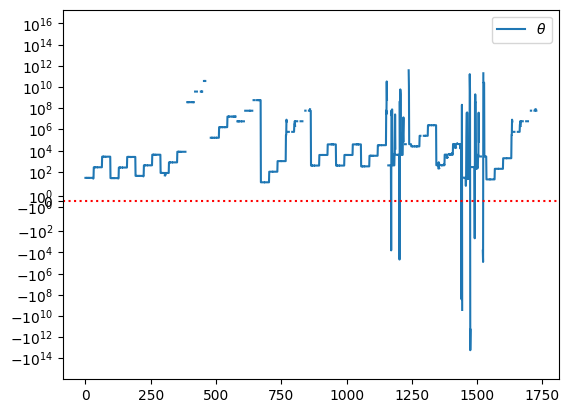

In [2]:
import matplotlib.pyplot as plt
plt.plot(data_df["theta"], label=r'$\theta$')
plt.axhline(0, color='r', linestyle=':')
plt.yscale("symlog")
plt.legend()

plt.savefig(f"theta_val__{filename}.png")